In [1]:
import pandas as pd
import io

from google.colab import files
uploaded = files.upload() 
#Import the above file into a Pandas data frame 
df = pd.read_csv(io.BytesIO(uploaded['employees_attrition.csv']),sep =",",engine='python')
display(df)

Saving employees_attrition.csv to employees_attrition.csv


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [5]:
#check null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
#Encode string categorical columns
from sklearn.preprocessing import LabelEncoder

d_types = dict(df.dtypes)

for name , type in d_types.items():
  if str(type) == 'object':
   le = LabelEncoder()
   df[name] = le.fit_transform(df[name])

In [11]:
df.shape

(1470, 35)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

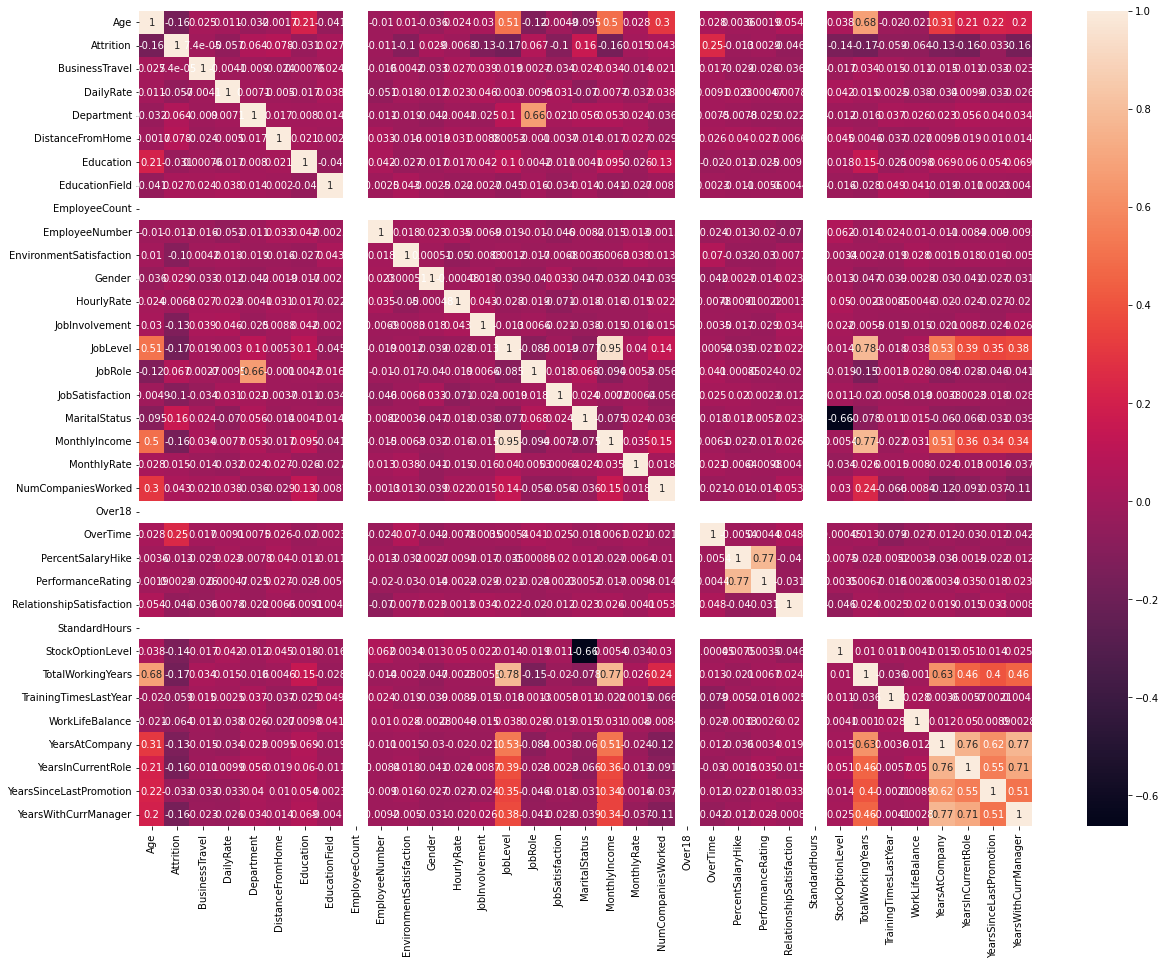

In [13]:
#check the correlation of the numerical columns through heatmap
import matplotlib as plt
import seaborn as sns

plt.rcParams['figure.figsize']=(20,15)
sns.heatmap(df.corr(),annot=True)

In [14]:
#df1 = df.copy()
#df.drop(['Attrition'],axis=1, inplace=True)

In [17]:
#Split the data into test and train with 80% train size and random state 0

from sklearn.model_selection import train_test_split
import numpy as np

remaining_columns = list(df.columns)
remaining_columns.remove('Attrition')
X = df[remaining_columns].values
y = df['Attrition'].values.astype(np.uint8)
#X.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)





(1176, 34)
(294, 34)
(1176,)
(294,)


In [79]:
#Apply decision tree

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_Pred = model.predict(X_test)
model.score(X_test,Y_test)

0.7619047619047619

In [80]:
#Obtain the Confusion matrix, Accuracy, F1 score and ROC-AUC and plot the ROC curve
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score , f1_score

print("Accouracy Score",accuracy_score(Y_test, Y_Pred))
print("Confusion Matrix",confusion_matrix(Y_test, Y_Pred))
print("Area under curve",roc_auc_score(Y_test, Y_Pred))
#print("Precision Score",precision_score(Y_test, Y_Pred))
#print("Recall score",recall_score(Y_test, Y_Pred))
print("F1 score",f1_score(Y_test, Y_Pred))

Accouracy Score 0.7619047619047619
Confusion Matrix [[208  37]
 [ 33  16]]
Area under curve 0.5877551020408163
F1 score 0.31372549019607837


In [81]:
#prune the tree and get the best hyper parameters

model = DecisionTreeClassifier(criterion='gini', max_depth=20, max_leaf_nodes=20, min_samples_split=20 )
model.fit(X_train,Y_train)
Y_Pred = model.predict(X_test)
model.score(X_test,Y_test)

0.8537414965986394

In [86]:
#Obtain the Confusion matrix, Accuracy, F1 score and ROC-AUC and plot the ROC curve
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score , f1_score, auc

print("Accouracy Score",accuracy_score(Y_test, Y_Pred))
print("Confusion Matrix",confusion_matrix(Y_test, Y_Pred))
print("Area under curve",roc_auc_score(Y_test, Y_Pred))
print("F1 score",f1_score(Y_test, Y_Pred))


Accouracy Score 0.8537414965986394
Confusion Matrix [[235  10]
 [ 33  16]]
Area under curve 0.6428571428571428
F1 score 0.42666666666666664


In [91]:
def plot_ROC(roc,fpr,tpr):
    import matplotlib.pyplot as plt
    plt.title("receiver Operating Charecteristc")
    plt.plot(fpr,tpr,'red',label = 'AUC=%0.2f'% roc)
    plt.legend(loc = 'lower right')
    plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
    plt.ylabel('True positive Rate')
    plt.xlabel('False positive Rate')
    plt.show()

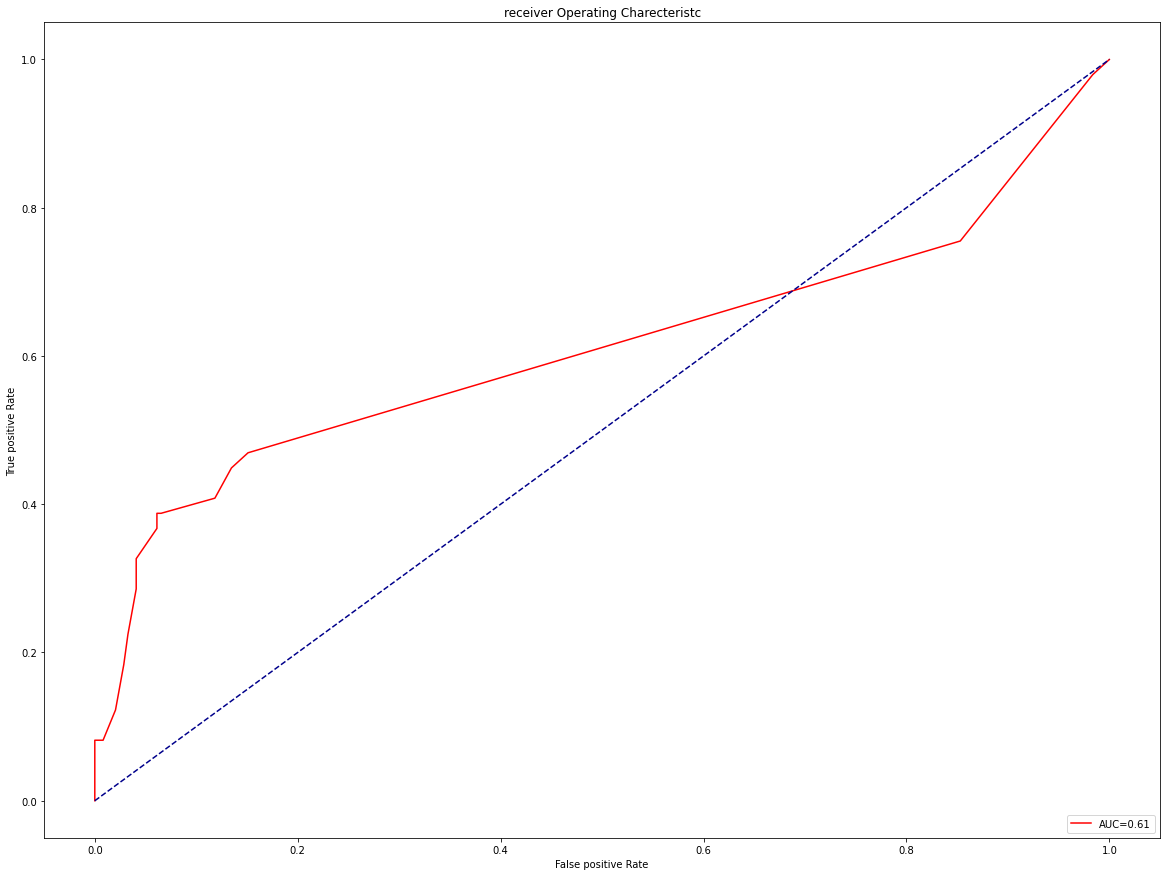

In [92]:
#y_pred_df = pd.DataFrame({"actual":Y_test,"predicted prob":model.predict_proba(X_test)})
prob = model.predict_proba(X_test)
prob_positive = prob[:,1]
prob_negative = prob[1,:]
fpr, tpr, threshold = roc_curve(Y_test,prob_positive)
roc_auc = auc(fpr,tpr)
plot_ROC(roc_auc,fpr,tpr)

In [93]:
#For this scenario get the best threshold and get the Accuracy, F1 score and AUC values

ftt = pd.DataFrame(np.hstack((threshold.reshape(-1,1),fpr.reshape(-1,1),tpr.reshape(-1,1))),columns = ['threshold','fpr','tpr'])
ftt

,threshold,fpr,tpr
0,2.000000,0.000000,0.000000
1,1.000000,0.000000,0.081633
2,0.928571,0.008163,0.081633
3,0.857143,0.020408,0.122449
4,0.842105,0.028571,0.183673
5,0.769231,0.032653,0.224490
6,0.684211,0.040816,0.285714
7,0.571429,0.040816,0.326531
8,0.297872,0.061224,0.367347
9,0.294118,0.061224,0.387755
